In [1]:
import pandas as pd
import warnings

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('owid-covid-data.csv')

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.000,1.000,nan,nan,nan,nan,...,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.511,nan
1,AFG,Asia,Afghanistan,2020-02-25,1.000,0.000,nan,nan,nan,nan,...,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.511,nan
2,AFG,Asia,Afghanistan,2020-02-26,1.000,0.000,nan,nan,nan,nan,...,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.511,nan
3,AFG,Asia,Afghanistan,2020-02-27,1.000,0.000,nan,nan,nan,nan,...,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.511,nan
4,AFG,Asia,Afghanistan,2020-02-28,1.000,0.000,nan,nan,nan,nan,...,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.511,nan


In [6]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
105928,ZWE,Africa,Zimbabwe,2021-07-25,97894.000,617.000,2039.286,3094.000,44.000,67.429,...,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,nan
105929,ZWE,Africa,Zimbabwe,2021-07-26,99944.000,2050.000,2030.286,3173.000,79.000,68.000,...,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,nan
105930,ZWE,Africa,Zimbabwe,2021-07-27,101711.000,1767.000,1899.429,3280.000,107.000,76.143,...,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,nan
105931,ZWE,Africa,Zimbabwe,2021-07-28,103567.000,1856.000,1778.143,3340.000,60.000,75.857,...,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,nan
105932,ZWE,Africa,Zimbabwe,2021-07-29,105656.000,2089.000,1747.857,3421.000,81.000,78.714,...,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,nan


In [7]:
data.isnull().sum()

iso_code                                      0
continent                                  4921
location                                      0
date                                          0
total_cases                                4324
new_cases                                  4327
new_cases_smoothed                         5337
total_deaths                              14652
new_deaths                                14497
new_deaths_smoothed                        5337
total_cases_per_million                    4863
new_cases_per_million                      4866
new_cases_smoothed_per_million             5871
total_deaths_per_million                  15178
new_deaths_per_million                    15023
new_deaths_smoothed_per_million            5871
reproduction_rate                         20561
icu_patients                              94920
icu_patients_per_million                  94920
hosp_patients                             92631
hosp_patients_per_million               

In [8]:
df1 = data[['iso_code','new_deaths','new_cases']]

In [9]:
df1

,iso_code,new_deaths,new_cases
0,AFG,nan,1.000
1,AFG,nan,0.000
2,AFG,nan,0.000
3,AFG,nan,0.000
4,AFG,nan,0.000
...,...,...,...
105928,ZWE,44.000,617.000
105929,ZWE,79.000,2050.000
105930,ZWE,107.000,1767.000
105931,ZWE,60.000,1856.000


In [10]:
df1.isnull().sum()

iso_code          0
new_deaths    14497
new_cases      4327
dtype: int64

In [12]:
df1.head()

,iso_code,new_deaths,new_cases
0,AFG,nan,1.000
1,AFG,nan,0.000
2,AFG,nan,0.000
3,AFG,nan,0.000
4,AFG,nan,0.000


In [13]:
df1.isnull().sum()

iso_code          0
new_deaths    14497
new_cases      4327
dtype: int64

In [14]:
df1.shape

(105933, 3)

In [15]:
df1_new = df1.groupby(['iso_code']).sum().reset_index()

In [16]:
df1_new

,iso_code,new_deaths,new_cases
0,ABW,0.000,0.000
1,AFG,6615.000,145996.000
2,AGO,1003.000,42486.000
3,AIA,0.000,0.000
4,ALB,2457.000,132999.000
...,...,...,...
226,WSM,0.000,3.000
227,YEM,1374.000,7042.000
228,ZAF,71431.000,2422151.000
229,ZMB,3355.000,194140.000


## Q-1 Find the country/countries with most number of deaths and cases and also provide the values for the same.


In [64]:
df1_new.sort_values(by=['new_deaths', 'new_cases'], ascending=False).head(20)

,iso_code,new_deaths,new_cases
163,OWID_WRL,4190136.000,196151416.000
157,OWID_EUR,1133887.000,51923237.000
162,OWID_SAM,1077357.000,35375906.000
160,OWID_NAM,921495.000,41451164.000
154,OWID_ASI,887597.000,60688166.000
156,OWID_EUN,743813.000,34609082.000
217,USA,612122.000,34750859.000
27,BRA,554497.000,19839369.000
91,IND,423217.000,31572344.000
127,MEX,239997.000,2810097.000


### Above are the top 10 countries with most number of deaths and cases

## Q-2 Find the country/countries with least number of deaths and cases and also provide the values for the same.


In [18]:
df1_new.sort_values(by=['new_deaths', 'new_cases'], ascending=False).tail(50)

,iso_code,new_deaths,new_cases
206,TLS,26.000,10695.000
151,NZL,26.000,2871.000
213,TZA,21.000,1017.000
138,MUS,19.000,3913.000
158,OWID_INT,15.000,721.000
220,VCT,12.000,2288.000
13,BDI,9.000,6865.000
110,LAO,6.000,5675.000
107,KNA,3.000,582.000
29,BRN,3.000,333.000


### Above are the top 50 countries with least number of deaths and cases 

## Q-3 Find the total number of cases and deaths in India

In [19]:
df3 = df1_new.set_index('iso_code')

In [20]:
df3

,new_deaths,new_cases
iso_code,,
ABW,0.000,0.000
AFG,6615.000,145996.000
AGO,1003.000,42486.000
AIA,0.000,0.000
ALB,2457.000,132999.000
...,...,...
WSM,0.000,3.000
YEM,1374.000,7042.000
ZAF,71431.000,2422151.000


In [21]:
df3.loc['IND', :]

new_deaths     423217.000
new_cases    31572344.000
Name: IND, dtype: float64

### Above are the total number of cases and deaths in India

## Q-4 Use FbProphet to forecast the number of cases for the next 30 days and plot the      graph for the same ( V. imp)

In [22]:
df4 = data[['date','new_cases']]

In [23]:
df4.head()

,date,new_cases
0,2020-02-24,1.000
1,2020-02-25,0.000
2,2020-02-26,0.000
3,2020-02-27,0.000
4,2020-02-28,0.000


In [24]:
df4.isnull().sum()

date            0
new_cases    4327
dtype: int64

In [26]:
df4.tail()

,date,new_cases
105928,2021-07-25,617.000
105929,2021-07-26,2050.000
105930,2021-07-27,1767.000
105931,2021-07-28,1856.000
105932,2021-07-29,2089.000


In [27]:
df4['date_org']= pd.to_datetime(df4['date'], format='%Y-%m-%d')

In [28]:
df4

,date,new_cases,date_org
0,2020-02-24,1.000,2020-02-24
1,2020-02-25,0.000,2020-02-25
2,2020-02-26,0.000,2020-02-26
3,2020-02-27,0.000,2020-02-27
4,2020-02-28,0.000,2020-02-28
...,...,...,...
105928,2021-07-25,617.000,2021-07-25
105929,2021-07-26,2050.000,2021-07-26
105930,2021-07-27,1767.000,2021-07-27
105931,2021-07-28,1856.000,2021-07-28


In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105933 entries, 0 to 105932
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       105933 non-null  object        
 1   new_cases  101606 non-null  float64       
 2   date_org   105933 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ MB


In [31]:
df4.drop(['date'], inplace=True, axis=1)

In [32]:
df4.head()

,new_cases,date_org
0,1.000,2020-02-24
1,0.000,2020-02-25
2,0.000,2020-02-26
3,0.000,2020-02-27
4,0.000,2020-02-28


In [33]:
df4_new = df4.groupby(['date_org']).sum().reset_index()

In [34]:
df4_new

,date_org,new_cases
0,2020-01-01,0.000
1,2020-01-02,0.000
2,2020-01-03,0.000
3,2020-01-04,0.000
4,2020-01-05,0.000
...,...,...
571,2021-07-25,1351120.000
572,2021-07-26,1699978.000
573,2021-07-27,1926464.000
574,2021-07-28,2000558.000


In [35]:
df4_new

,date_org,new_cases
0,2020-01-01,0.000
1,2020-01-02,0.000
2,2020-01-03,0.000
3,2020-01-04,0.000
4,2020-01-05,0.000
...,...,...
571,2021-07-25,1351120.000
572,2021-07-26,1699978.000
573,2021-07-27,1926464.000
574,2021-07-28,2000558.000


In [36]:
df4_new.columns = ['ds', 'y']
df4_new.head()

,ds,y
0,2020-01-01,0.000
1,2020-01-02,0.000
2,2020-01-03,0.000
3,2020-01-04,0.000
4,2020-01-05,0.000


In [37]:
import fbprophet

In [38]:
from fbprophet import Prophet

In [39]:
model = Prophet()

In [40]:
model.fit(df4_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [42]:
df4_new.tail()

,ds,y
571,2021-07-25,1351120.000
572,2021-07-26,1699978.000
573,2021-07-27,1926464.000
574,2021-07-28,2000558.000
575,2021-07-29,2043902.000


In [43]:
future_dates=model.make_future_dataframe(periods=30)

In [44]:
future_dates.tail()

,ds
601,2021-08-24
602,2021-08-25
603,2021-08-26
604,2021-08-27
605,2021-08-28


In [45]:
prediction=model.predict(future_dates)

In [46]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
601,2021-08-24,1446522.283,1044382.197,1844409.846,1434727.324,1458726.591,6210.117,6210.117,6210.117,6210.117,6210.117,6210.117,0.000,0.000,0.000,1452732.400
602,2021-08-25,1443989.728,1128775.991,1963336.723,1430880.397,1457351.092,104794.545,104794.545,104794.545,104794.545,104794.545,104794.545,0.000,0.000,0.000,1548784.274
603,2021-08-26,1441457.174,1169331.328,1985592.209,1427793.545,1455589.006,131682.141,131682.141,131682.141,131682.141,131682.141,131682.141,0.000,0.000,0.000,1573139.315
604,2021-08-27,1438924.619,1154248.010,1973976.860,1424402.912,1453961.878,109807.706,109807.706,109807.706,109807.706,109807.706,109807.706,0.000,0.000,0.000,1548732.326
605,2021-08-28,1436392.065,988660.166,1781275.407,1421209.179,1452242.672,-22925.915,-22925.915,-22925.915,-22925.915,-22925.915,-22925.915,0.000,0.000,0.000,1413466.149


In [47]:
pred_values = prediction.loc[575:]

In [48]:
pred_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
575,2021-07-29,1512368.698,1231579.019,2034700.023,1512368.698,1512368.698,131682.141,131682.141,131682.141,131682.141,131682.141,131682.141,0.000,0.000,0.000,1644050.838
576,2021-07-30,1509836.143,1209996.690,2014516.105,1509836.143,1509836.143,109807.706,109807.706,109807.706,109807.706,109807.706,109807.706,0.000,0.000,0.000,1619643.850
577,2021-07-31,1507303.589,1080013.660,1921018.231,1507303.589,1507303.589,-22925.915,-22925.915,-22925.915,-22925.915,-22925.915,-22925.915,0.000,0.000,0.000,1484377.673
578,2021-08-01,1504771.034,937231.995,1758337.034,1504771.034,1504771.034,-177223.720,-177223.720,-177223.720,-177223.720,-177223.720,-177223.720,0.000,0.000,0.000,1327547.314
579,2021-08-02,1502238.480,952405.243,1740418.905,1502238.480,1502238.480,-152344.874,-152344.874,-152344.874,-152344.874,-152344.874,-152344.874,0.000,0.000,0.000,1349893.605


In [49]:
num_of_cases_for_30days = pred_values['yhat'].values

In [50]:
num_of_cases_for_30days

array([1644050.83846256, 1619643.84951248, 1484377.67328812,
       1327547.31394635, 1349893.60539257, 1505916.04284904,
       1601967.91643151, 1626322.95750927, 1601915.96855913,
       1466649.7923347 , 1309819.43299299, 1332165.72443937,
       1488188.16189525, 1584240.03547826, 1608595.07655599,
       1584188.08760579, 1448921.91138128, 1292091.55203999,
       1314437.84348617, 1470460.28094207, 1566512.1545248 ,
       1590867.1956027 , 1566460.20665245, 1431194.03042858,
       1274363.67108663, 1296709.96253297, 1452732.39998889,
       1548784.27357155, 1573139.31464938, 1548732.3256991 ,
       1413466.14947516])

Above are the next 30 days predictions of the cases

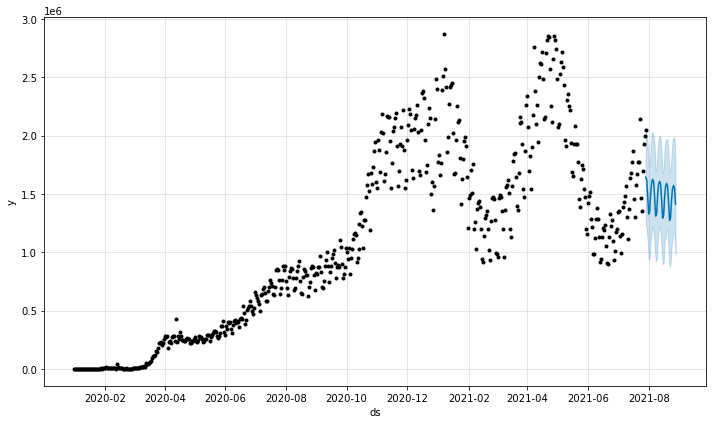

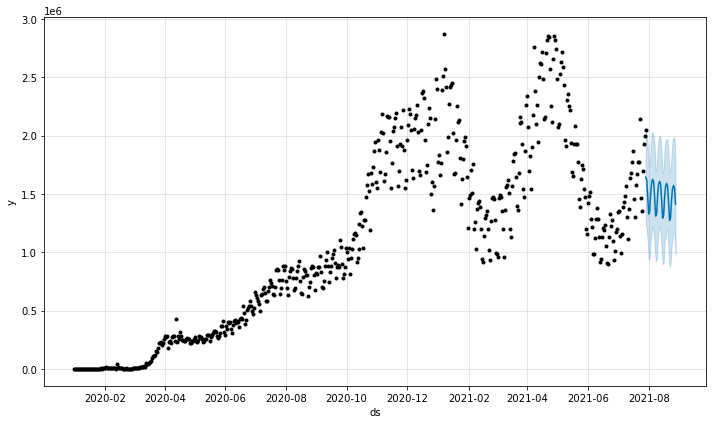

In [51]:
model.plot(pred_values)

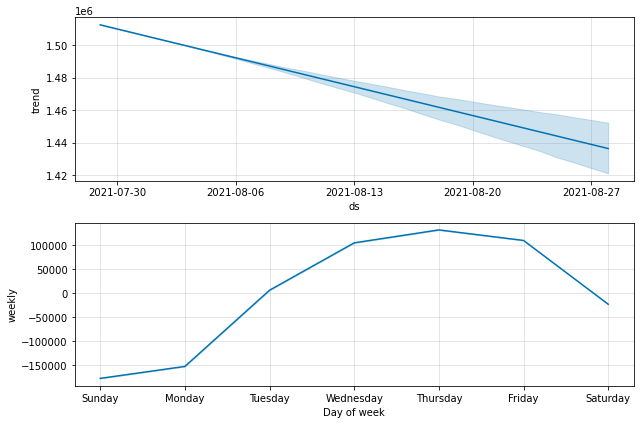

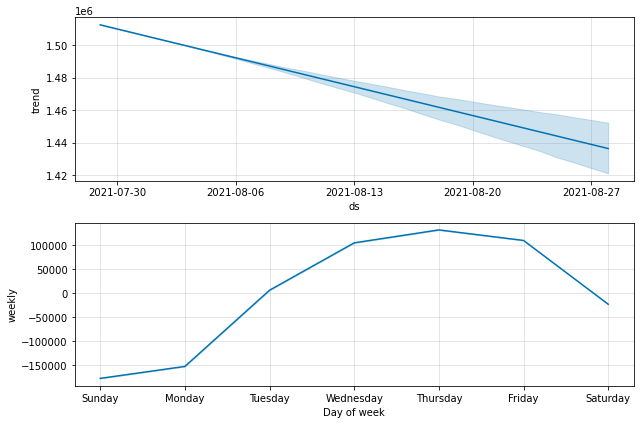

In [52]:
model.plot_components(pred_values)

### Above the plots for our next 30 days prediction and also the weekly trend of the cases

## Q-5 Use matplotlib/seaborn to plot the monthly trend of covid 19 cases starting from 1st Oct 2020

In [53]:
df5 = data[['date','new_cases']]

In [54]:
df5.head(10)

,date,new_cases
0,2020-02-24,1.000
1,2020-02-25,0.000
2,2020-02-26,0.000
3,2020-02-27,0.000
4,2020-02-28,0.000
5,2020-02-29,0.000
6,2020-03-01,0.000
7,2020-03-02,0.000
8,2020-03-03,1.000
9,2020-03-04,2.000


In [55]:
df5.set_index('date', inplace=True)

In [56]:
df5.index = pd.to_datetime(df5.index)

In [57]:
df5.head(10)

,new_cases
date,
2020-02-24,1.000
2020-02-25,0.000
2020-02-26,0.000
2020-02-27,0.000
2020-02-28,0.000
2020-02-29,0.000
2020-03-01,0.000
2020-03-02,0.000
2020-03-03,1.000


In [58]:
df5_new = df5.resample('1M').sum()

In [59]:
df5_new.reset_index()

,date,new_cases
0,2020-01-31,28123.000
1,2020-02-29,228948.000
2,2020-03-31,2767796.000
3,2020-04-30,7808776.000
4,2020-05-31,8889305.000
5,2020-06-30,12926127.000
6,2020-07-31,21614259.000
7,2020-08-31,24188113.000
8,2020-09-30,26512846.000
9,2020-10-31,39857386.000


In [60]:
df_new_toplot = df5_new.iloc[8:, :]

In [61]:
df_new_toplot

,new_cases
date,
2020-09-30,26512846.000
2020-10-31,39857386.000
2020-11-30,57033720.000
2020-12-31,61969535.000
2021-01-31,62426009.000
2021-02-28,36303803.000
2021-03-31,48463180.000
2021-04-30,71494145.000
2021-05-31,60805413.000


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date', ylabel='new_cases'>

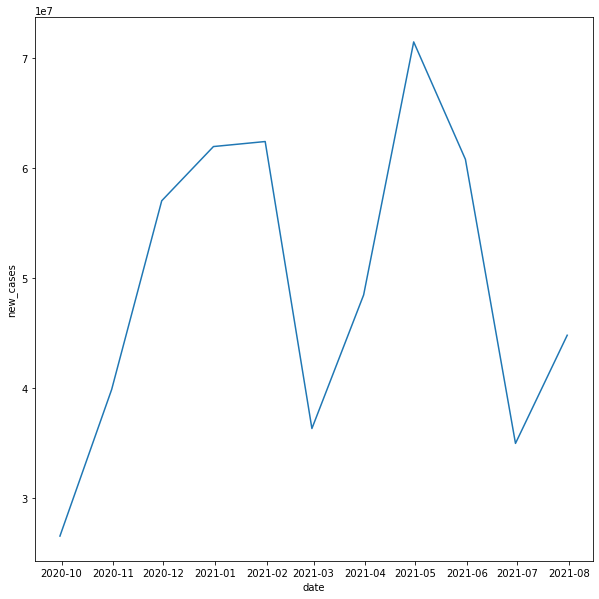

In [63]:
plt.figure(figsize=(10,10))
sns.lineplot(x='date', y='new_cases', data = df_new_toplot)

### Above is the monthly plot of the cases